In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [123]:
data = pd.read_csv('state-wise-crop-production-India.csv')

#Find the average production of the crops in India.


In [124]:
total_crop_prod = data['Production'].sum()/14
print('Average production of the crops in India is '+str(round(total_crop_prod,2)) +' Tonnes')

Average production of the crops in India is 8528101538.58 Tonnes


# Which crop has maximum yield (Tonnes / Hectare)?

In [125]:
data['Yield']=data['Production']/data['Area']
max_yield = data['Yield'].max()

max_crop_details= data[data['Yield'].isin([max_yield])]
print( 'The state with maximum yield is in '+max_crop_details['State'].values[0]+ ' With total yield of '+str(max_yield)+' Tonnes/Hectare in the year '+str(max_crop_details['Year'].values[0])+' for '+str(max_crop_details['Crop'].values[0]))

The state with maximum yield is in Punjab With total yield of 70662.5 Tonnes/Hectare in the year 2011 for Sugarcane


# Write a comparative study on Rice production between Odisha and West Bengal

In [126]:
data_rice_prod = data[data['Crop'].isin(['Rice'])]
State_list_rice=data_rice_prod['State'].unique()
data_rice_prod_Odisha = data_rice_prod[data_rice_prod['State'].isin(['Odisha'])]
data_rice_prod_WestB = data_rice_prod[data_rice_prod['State'].isin(['West Bengal'])]

In below code cell we are finding the ranking of state according to there average production of rice.

In [127]:
mean_production_list_rice=[]

for x in State_list_rice:
  data1 = data[data['Crop'].isin(['Rice'])]
  state_data = data1[data1['State'].isin([x])]
  state_mean_production=state_data['Production'].mean()
  mean_production_list_rice.append([x,state_mean_production])

Datalist_mean_rice_production=pd.DataFrame(mean_production_list_rice,columns =['State', 'Avg production'])
print(Datalist_mean_rice_production.nlargest(5,'Avg production'))
print('From above we can draw conclusion that West Bengal rank 1st and odisha rank 5th in rice production PAN india')

             State  Avg production
32     West Bengal    1.441807e+07
30   Uttar Pradesh    1.216708e+07
24          Punjab    1.028821e+07
1   Andhra Pradesh    7.524632e+06
22          Odisha    6.652170e+06
From above we can draw conclusion that West Bengal rank 1st and odisha rank 5th in rice production PAN india


In cell below we are visually describing production data from both state to draw conclusions 

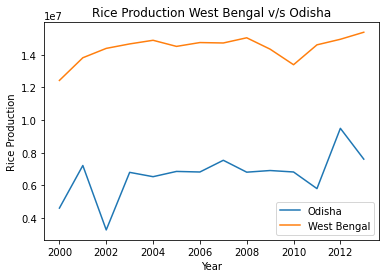

In [128]:
%matplotlib inline

ax = data_rice_prod_Odisha.plot(x='Year',y='Production',label="Odisha")
data_rice_prod_WestB.plot(x='Year',y='Production',ax=ax,label="West Bengal")

plt.title('Rice Production West Bengal v/s Odisha')
plt.xlabel('Year')
plt.ylabel('Rice Production')
plt.show()

In cell below we are calculating mean of production data from both state to draw numerical conclusions 

In [129]:
mean_rice_yield_Odisha = data_rice_prod_Odisha['Production'].mean()
mean_rice_yield_WestB = data_rice_prod_WestB['Production'].mean()
print('Taking into consideration the mean data of 14 years the rice production of West Bengal is '+str(round(mean_rice_yield_WestB/mean_rice_yield_Odisha,2))+' times the rice production in Odisha' )

Taking into consideration the mean data of 14 years the rice production of West Bengal is 2.17 times the rice production in Odisha


#Which State has the highest production of Wheat?


In [130]:
ab=data[data['Crop'].isin(['Wheat'])]
State_list=ab['State'].unique() #here we have created list of state who produce wheat 
#print(State_list)

#this list is created to store mean production of each wheat producing state over course of 14 years
mean_production_list=[]

for x in State_list:
  data1 = data[data['Crop'].isin(['Wheat'])]
  state_data = data1[data1['State'].isin([x])]
  state_mean_production=state_data['Production'].mean()
  mean_production_list.append(state_mean_production)
max_wheat_production=max(mean_production_list)
i=mean_production_list.index(max_wheat_production)

#based on index of Max value of mean we have backtracked name of state.
print( State_list[i]+' has maximum wheat production.')

Uttar Pradesh has maximum wheat production.


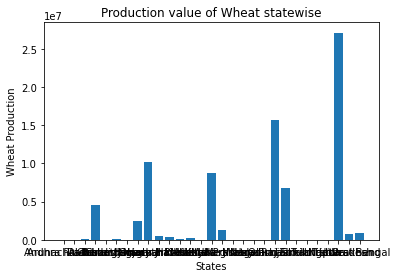

In [131]:
plt.bar(x=State_list,height=mean_production_list)
plt.title('Production value of Wheat statewise')
plt.xlabel('States')
plt.ylabel('Wheat Production')
plt.show()


# Build a model to predict the production of Rice in 2014 for Andhra Pradesh, Uttar Pradesh and Tamil Nadu

preparing dataset for model development for each state

In [132]:
#from complete dataset segrigating rice data
data_1= data[data['Crop'].isin(['Rice'])]
model_data_Andhra_Pradesh= data_1[data_1['State'].isin(['Andhra Pradesh'])]
model_data_Uttar_Pradesh = data_1[data_1['State'].isin(['Uttar Pradesh'])]
model_data_Tamil_Nadu = data_1[data_1['State'].isin(['Tamil Nadu'])]


preprocing and refining data and Implementing Random Forest Regressor



7709154.2


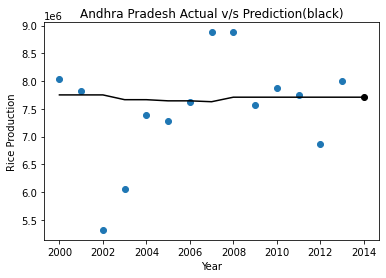

In [133]:
x = model_data_Andhra_Pradesh.iloc[:,[1,3]].values
y = model_data_Andhra_Pradesh.iloc[:,4].values
#print(x)
#print(y)
plt.scatter(x=x[:,0],y=y)
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 5, random_state = 0)
regressor.fit(x, y)
predict=regressor.predict([[2014,x[:,1].mean()]])
print(predict[0])
X_grid = np.arange(2000, 2015, 1)
Y_grid=[]
for xa in X_grid:
  predict=regressor.predict([[xa,x[:,1].mean()]])
  Y_grid.append(predict[0])

plt.scatter(2014,predict, color = 'black')
plt.plot(X_grid, Y_grid, color = 'black',label="predicted value")
plt.title('Andhra Pradesh Actual v/s Prediction(black)')
plt.xlabel('Year')
plt.ylabel('Rice Production')
plt.show()

13548553.0


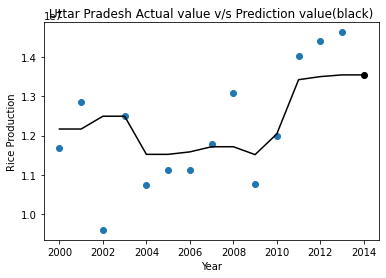

In [134]:
x1 = model_data_Uttar_Pradesh.iloc[:,[1,3]].values
y1 = model_data_Uttar_Pradesh.iloc[:,4].values
plt.scatter(x=x1[:,0],y=y1,label="Actual value")
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 5, random_state = 0)
regressor.fit(x1, y1)
predict1=regressor.predict([[2014,x1[:,1].mean()]])
X1_grid = np.arange(2000, 2015, 1)
Y1_grid=[]
for xb in X1_grid:
  predict1=regressor.predict([[xb,x1[:,1].mean()]])
  Y1_grid.append(predict1[0])

print(predict1[0])
plt.scatter(2014,predict1, color = 'black',label="predicted value")
plt.plot(X1_grid, Y1_grid, color = 'black',label="predicted value")
plt.title('Uttar Pradesh Actual value v/s Prediction value(black)')
plt.xlabel('Year')
plt.ylabel('Rice Production')
plt.show()

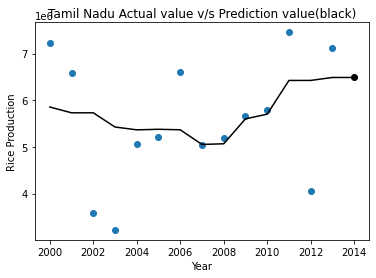

In [135]:
x2 = model_data_Tamil_Nadu.iloc[:,[1,3]].values
y2 = model_data_Tamil_Nadu.iloc[:,4].values
plt.scatter(x=x2[:,0],y=y2)
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x2, y2)
predict2=regressor.predict([[2014,x2[:,1].mean()]])
X2_grid = np.arange(2000, 2015, 1)
Y2_grid=[]
for xc in X2_grid:
  predict2=regressor.predict([[xc,x2[:,1].mean()]])
  Y2_grid.append(predict2[0])

plt.scatter(2014,predict2, color = 'black')
plt.plot(X2_grid, Y2_grid, color = 'black',label="predicted value")
plt.title('Tamil Nadu Actual value v/s Prediction value(black)')
plt.xlabel('Year')
plt.ylabel('Rice Production')
plt.show()

In [136]:

print('Predicted value for the production of Rice in 2014 for Andhra Pradesh is '+ str(predict[0])+ '(Tonnes), Uttar Pradesh is '+str(predict1[0])+'(Tonnes) and Tamil Nadu is '+str(predict2[0])+'(Tonnes)')

Predicted value for the production of Rice in 2014 for Andhra Pradesh is 7709154.2(Tonnes), Uttar Pradesh is 13548553.0(Tonnes) and Tamil Nadu is 6489482.1(Tonnes)
